<a href="https://colab.research.google.com/github/richardky30/housing-data/blob/main/housingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

As housing! prices continue to rise beyond reasonable levels during the COVID-19 pandemic, analysts predict that the bubble will eventually burst. However, these analysts have been making the same predictions for the past few years now. One must question what criteria are being used in order to make these forecasts. 

This notebook will guide the reader through a rudimentary exploration of home prices and how they compare to two different datasets. Rather than providing a rigorous technical analysis, the goal here is to demonstrate basic data visualization techniques through the use of the Python programming language and the pandas data analysis software library. 

# Graph #1 (Price vs. Time)

First, we will want to import the `pandas` library.

In [ ]:
import pandas as pd

Next, we should read in the housing data using the `read_csv()` method.

In [ ]:
url = 'https://raw.githubusercontent.com/richardky30/housing-data/main/data.csv'
df = pd.read_csv(url)

Let us check whether the data was loaded correctly by printing it out.


In [ ]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,102001,0,United States,Country,NaN,271617.0,272983.0,279333.0,288667.0,295633.0,299267.0,299900.0,299600.0,299267.0,298633.0,297267.0,294267.0,291567.0,292933.0,297967.0,306497.0,314463.0,320963.0,322433.0,319800.0,315600.0,312267.0,307267.0,303267.0,299800.0,301467.0,306500.0,313000.0,320650.0,328450.0,335450.0,340463.0,342630.0,344130.0,342800.0,338500.0,333633.0,333963.0,340597.0,353963.0,367283.0,378283.0,381583.0,379933.0,376633.0,375000.0,374967.0,372967.0
1,394913,1,"New York, NY",Msa,NY,517967.0,523000.0,534333.0,544667.0,554667.0,560000.0,560000.0,554833.0,549833.0,549833.0,550000.0,549667.0,549333.0,549333.0,554667.0,563333.0,573300.0,578267.0,578267.0,574633.0,573000.0,574333.0,577667.0,579000.0,577667.0,579333.0,586000.0,594000.0,599000.0,602000.0,612300.0,628967.0,642892.0,649592.0,652926.0,657000.0,663633.0,668967.0,673567.0,675933.0,675933.0,669000.0,659667.0,646333.0,639667.0,636333.0,638000.0,642667.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798667.0,802667.0,818000.0,835000.0,848300.0,849633.0,841300.0,824296.0,802296.0,785629.0,772667.0,761633.0,752967.0,749633.0,761300.0,778266.0,804600.0,824300.0,840333.0,847000.0,845667.0,845967.0,845967.0,848967.0,849333.0,865963.0,882963.0,887129.0,882500.0,892167.0,924333.0,955633.0,967600.0,972933.0,978300.0,989667.0,997600.0,999200.0,1007867.0,1008267.0,1008333.0,999666.0,992990.0,975657.0,952623.0,940967.0,936633.0,941667.0
3,394463,3,"Chicago, IL",Msa,IL,301497.0,305967.0,319467.0,336133.0,346133.0,348600.0,344933.0,338267.0,330967.0,324933.0,318300.0,309933.0,303267.0,306600.0,319633.0,336000.0,345833.0,348167.0,345067.0,338533.0,331533.0,324933.0,319633.0,311300.0,306333.0,309967.0,320800.0,328800.0,332167.0,336500.0,343467.0,348467.0,349967.0,349667.0,346000.0,339663.0,331663.0,331997.0,338300.0,346633.0,352967.0,354667.0,354633.0,348267.0,339933.0,332967.0,327300.0,322267.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341666.0,345000.0,351648.0,359745.0,366079.0,365931.0,359467.0,351100.0,344567.0,341233.0,339600.0,337967.0,335333.0,335633.0,340600.0,348267.0,354933.0,356300.0,354600.0,349600.0,344933.0,341633.0,339997.0,338330.0,335293.0,334512.0,336178.0,339182.0,343133.0,348133.0,354800.0,358267.0,359933.0,359267.0,356787.0,353454.0,350820.0,351813.0,356146.0,364480.0,374333.0,383333.0,390000.0,393333.0,395967.0,396630.0,398297.0,401330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,394528,90,"Daytona Beach, FL",Msa,FL,269600.0,270600.0,272267.0,275567.0,280433.0,285133.0,288467.0,287600.0,284567.0,280767.0,277433.0,275633.0,274767.0,274800.0,276630.0,280797.0,285630.0,288306.0,287473.0,284273.0,280763.0,277860.0,276893.0,277396.0,278333.0,281000.0,283833.0,284133.0,282466.0,281600.0,284705.0,287705.0,289443.0,289705.0,291338.0,291577.0,293527.0,297227.0,303867.0,314917.0,324884.0,335687.0,341021.0,345721.0,348000.0,352667.0,356000.0,357330.0
91,394531,91,"Des Moines, IA",Msa,IA,281600.0,285950.0,292283.0,297283.0,299600.0,299900.0,299900.0,297567.0,294233.0,290900.0,289100.0,287433.0,285800.0,286300.0,288833.0,292133.0,293600.0,293600.0,291105.0,286605.0,280772.0,273300.0,266830.0,261830.0,261830.0,265997.0,271170.0,275170.0,277874.0,281667.0,284333.0,283933.0,281225.0,277192.0,274058.0,272303.0,273670.0,2

Alternatively, we can use the `head()` function to look at just the first five rows. 

In [ ]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,102001,0,United States,Country,NaN,271617.0,272983.0,279333.0,288667.0,295633.0,299267.0,299900.0,299600.0,299267.0,298633.0,297267.0,294267.0,291567.0,292933.0,297967.0,306497.0,314463.0,320963.0,322433.0,319800.0,315600.0,312267.0,307267.0,303267.0,299800.0,301467.0,306500.0,313000.0,320650.0,328450.0,335450.0,340463.0,342630.0,344130.0,342800.0,338500.0,333633.0,333963.0,340597.0,353963.0,367283.0,378283.0,381583.0,379933.0,376633.0,375000.0,374967.0,372967.0
1,394913,1,"New York, NY",Msa,NY,517967.0,523000.0,534333.0,544667.0,554667.0,560000.0,560000.0,554833.0,549833.0,549833.0,550000.0,549667.0,549333.0,549333.0,554667.0,563333.0,573300.0,578267.0,578267.0,574633.0,573000.0,574333.0,577667.0,579000.0,577667.0,579333.0,586000.0,594000.0,599000.0,602000.0,612300.0,628967.0,642892.0,649592.0,652926.0,657000.0,663633.0,668967.0,673567.0,675933.0,675933.0,669000.0,659667.0,646333.0,639667.0,636333.0,638000.0,642667.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798667.0,802667.0,818000.0,835000.0,848300.0,849633.0,841300.0,824296.0,802296.0,785629.0,772667.0,761633.0,752967.0,749633.0,761300.0,778266.0,804600.0,824300.0,840333.0,847000.0,845667.0,845967.0,845967.0,848967.0,849333.0,865963.0,882963.0,887129.0,882500.0,892167.0,924333.0,955633.0,967600.0,972933.0,978300.0,989667.0,997600.0,999200.0,1007867.0,1008267.0,1008333.0,999666.0,992990.0,975657.0,952623.0,940967.0,936633.0,941667.0
3,394463,3,"Chicago, IL",Msa,IL,301497.0,305967.0,319467.0,336133.0,346133.0,348600.0,344933.0,338267.0,330967.0,324933.0,318300.0,309933.0,303267.0,306600.0,319633.0,336000.0,345833.0,348167.0,345067.0,338533.0,331533.0,324933.0,319633.0,311300.0,306333.0,309967.0,320800.0,328800.0,332167.0,336500.0,343467.0,348467.0,349967.0,349667.0,346000.0,339663.0,331663.0,331997.0,338300.0,346633.0,352967.0,354667.0,354633.0,348267.0,339933.0,332967.0,327300.0,322267.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341666.0,345000.0,351648.0,359745.0,366079.0,365931.0,359467.0,351100.0,344567.0,341233.0,339600.0,337967.0,335333.0,335633.0,340600.0,348267.0,354933.0,356300.0,354600.0,349600.0,344933.0,341633.0,339997.0,338330.0,335293.0,334512.0,336178.0,339182.0,343133.0,348133.0,354800.0,358267.0,359933.0,359267.0,356787.0,353454.0,350820.0,351813.0,356146.0,364480.0,374333.0,383333.0,390000.0,393333.0,395967.0,396630.0,398297.0,401330.0


Finally, we can experiment with some data visualization. How about we graph  the median US home list price for each month in 2021? Let us start by selecting only the row for the US as a whole and the columns for the months of 2021 using the `loc[]` method, which allows us to select certain rows and columns by label(s).

In [ ]:
us_row = df.loc[df.RegionName == 'United States', ['2021' in year for year in df.columns]]
us_row

,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,333633.0,333963.0,340597.0,353963.0,367283.0,378283.0,381583.0,379933.0,376633.0,375000.0,374967.0,372967.0


Now we need the months and prices in two separate columns. We will convert the row of column names/dates and the row of prices to single columns. Then, we will convert the two lists into tuples using the `zip()` function, merge the tuples into a list, and finally create a `DataFrame` using the list.

In [ ]:
dates = us_row.columns
prices = us_row.values.tolist()[0]
zipped = list(zip(dates, prices))
us_recent = pd.DataFrame(zipped, columns = ['Date', 'Price'])
us_recent

,Date,Price
0,2021-01-31,333633.0
1,2021-02-28,333963.0
2,2021-03-31,340597.0
3,2021-04-30,353963.0
4,2021-05-31,367283.0
5,2021-06-30,378283.0
6,2021-07-31,381583.0
7,2021-08-31,379933.0
8,2021-09-30,376633.0
9,2021-10-31,375000.0


We are now able to graph this data using the `plot()` method (which creates a line plot using matplotlib by default) from `pandas`. But before we do that, we should convert the dates to actual datetime objects with the `to_datetime()` method.

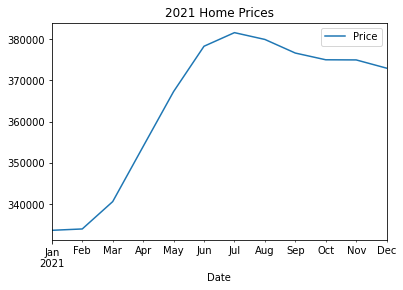

In [ ]:
us_recent.Date = pd.to_datetime(us_recent.Date)
us_recent.plot(x = 'Date', title = '2021 Home Prices')

# Graph #2 (Price & Stock Index vs. Time)

Now that we have finished graphing the home price data by itself, we should move on to a more complex task: making comparisons. Some might think that the stock market has a positive correlation with the real estate market. We will explore this idea by adding the S&P 500 index to our graph.

Let us first import the stock index data for each month in 2021. 

In [ ]:
stock_url = 'https://raw.githubusercontent.com/richardky30/stock-data/main/data.csv'
stock_df = pd.read_csv(stock_url, thousands = ",")
stock_df

,Date,Open,High,Low,Close
0,12/2021,4602.82,4808.93,4495.12,4766.18
1,11/2021,4610.62,4743.83,4560.00,4567.00
2,10/2021,4317.16,4608.08,4278.94,4605.38
3,09/2021,4528.80,4545.85,4305.91,4307.54
4,08/2021,4406.86,4537.36,4367.73,4522.68
5,07/2021,4300.73,4429.97,4233.13,4395.26
6,06/2021,4216.52,4302.43,4164.40,4297.50
7,05/2021,4191.98,4238.04,4056.88,4204.11
8,04/2021,3992.78,4218.78,3992.78,4181.17
9,03/2021,3842.51,3994.41,3723.34,3972.89


What if we just want the average of the open, high, low, and close (OHLC) for each month? Here we use the `iloc[]` method, which is similar to the `loc[]` method, except that it provides indexing based upon integer position rather than labels.

In [ ]:
stock_df['OHLC'] = stock_df.iloc[:, 1:5].mean(axis=1).round(2)
stock_df.drop(stock_df.iloc[:, 1:5], axis=1, inplace=True)
stock_df

,Date,OHLC
0,12/2021,4668.26
1,11/2021,4620.36
2,10/2021,4452.39
3,09/2021,4422.03
4,08/2021,4458.66
5,07/2021,4339.77
6,06/2021,4245.21
7,05/2021,4172.75
8,04/2021,4096.38
9,03/2021,3883.29


In order to compare a stock market index and the housing market, we should utilize a common standard. Growth percentage seems like a reasonable choice. An arbitrary date (we will choose the 1st for convenience) must be prepended to each month in order to make using the `to_datetime()` method possible. The `reset_index()` method with `drop=True` allows us to reset the indices and drop the old ones after reversing the order of the rows, the `diff()` method allows us to find the difference between the current row and the previous row, and the `shift()` method allows us to refer back to previous rows. Here we use `diff()` and `shift()` in our formula for calculating growth.

In [ ]:
stock_df.Date = pd.to_datetime('01/' + stock_df.Date, dayfirst=True) 
stock_df = stock_df.iloc[::-1].reset_index(drop=True)
stock_df['Growth'] = (stock_df.OHLC.diff() / stock_df.OHLC.shift(1))
stock_df.Growth = round(stock_df.Growth * 100, 2)
stock_df

,Date,OHLC,Growth
0,2021-01-01,3753.12,NaN
1,2021-02-01,3804.59,1.37
2,2021-03-01,3883.29,2.07
3,2021-04-01,4096.38,5.49
4,2021-05-01,4172.75,1.86
5,2021-06-01,4245.21,1.74
6,2021-07-01,4339.77,2.23
7,2021-08-01,4458.66,2.74
8,2021-09-01,4422.03,-0.82
9,2021-10-01,4452.39,0.69


How about we do something similar for the housing data?

In [ ]:
us_recent['Growth'] = (us_recent.Price.diff() / us_recent.Price.shift(1))
us_recent.Growth = round(us_recent.Growth * 100, 2)
us_recent

,Date,Price,Growth
0,2021-01-31,333633.0,NaN
1,2021-02-28,333963.0,0.10
2,2021-03-31,340597.0,1.99
3,2021-04-30,353963.0,3.92
4,2021-05-31,367283.0,3.76
5,2021-06-30,378283.0,2.99
6,2021-07-31,381583.0,0.87
7,2021-08-31,379933.0,-0.43
8,2021-09-30,376633.0,-0.87
9,2021-10-31,375000.0,-0.43


Finally, we can compare the two datasets by plotting their month-by-month growth percentages on the same graph.

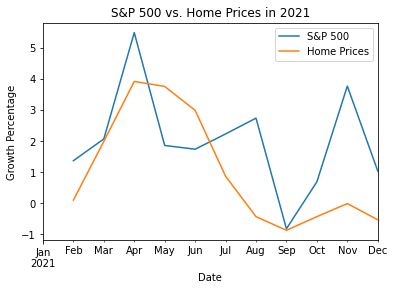

In [ ]:
ax = stock_df.plot(x = 'Date', y = 'Growth')
us_recent.plot(x = 'Date', y = 'Growth', ax=ax, title = 'S&P 500 vs. Home Prices in 2021',
               ylabel = 'Growth Percentage')
ax.legend(["S&P 500", "Home Prices"]);

We are now finished! Thanks for following along with me, and please email me at richardky30@gmail.com with any comments, concerns, or corrections.